1. Understand the data

In [72]:
# Importing the pandas package
import pandas as pd

# Reading in .csv, which is comma delimited.
df=pd.read_csv('https://raw.githubusercontent.com/saintsaintsan/Project/refs/heads/main/finalstudentscore.csv')

# Print the number of features, number of data points
print(df.shape)

# Print the name of the feature of the data points
print(df.columns)

# Clean the columns names
df.columns = [name.strip() for name in list(df.columns)]
print(df.columns)

#Print the information of the dataset and check data types
df.info()



(300, 8)
Index(['ictmockexamscore', 'ictpracticalscore', 'icttheoryscore', 'attendance',
       'revisiontime', 'finalexamscore', 'average_score', 'effective_study'],
      dtype='object')
Index(['ictmockexamscore', 'ictpracticalscore', 'icttheoryscore', 'attendance',
       'revisiontime', 'finalexamscore', 'average_score', 'effective_study'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ictmockexamscore   300 non-null    float64
 1   ictpracticalscore  300 non-null    float64
 2   icttheoryscore     300 non-null    float64
 3   attendance         300 non-null    float64
 4   revisiontime       300 non-null    float64
 5   finalexamscore     300 non-null    float64
 6   average_score      300 non-null    float64
 7   effective_study    300 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


In [73]:
!git clone https://github.com/saintsaintsan/Project

Cloning into 'Project'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 44.97 KiB | 2.37 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [74]:
!pip install geopandas

In [75]:
import pandas as pd

In [76]:
%cd Project

/content/Project/Project/Project


In [77]:
!ls

data				  README.md
finalstudentscore.csv		  sampleStudent.csv
ict_student_scores_250.csv	  tblICTStudentScore.csv
igcse_ict_exam_readiness_300.csv


In [78]:
!pip install pandas matplotlib seaborn

In [79]:
url='https://raw.githubusercontent.com/saintsaintsan/Project/refs/heads/main/finalstudentscore.csv'
df = pd.read_csv(url)
df.head()

,ictmockexamscore,ictpracticalscore,icttheoryscore,attendance,revisiontime,finalexamscore,average_score,effective_study
0,67.450712,55.052060,68.625795,88.686733,10.375674,64.22,63.709522,9.201846
1,57.926035,58.277828,38.401024,81.066612,8.711783,53.53,51.534962,7.062348
2,69.715328,73.967523,70.652907,85.287448,10.366893,68.73,71.445253,8.841658
3,82.845448,72.324443,79.401481,97.784519,11.629894,76.61,78.190457,11.372236
4,56.487699,64.749181,62.441828,86.910991,10.146580,61.22,61.226236,8.818493


In [80]:
df.columns

Index(['ictmockexamscore', 'ictpracticalscore', 'icttheoryscore', 'attendance',
       'revisiontime', 'finalexamscore', 'average_score', 'effective_study'],
      dtype='object')

2. Data Spliting

In [81]:
#select the dependent and target
finalexamscore_feature = ['ictmockexamscore', 'ictpracticalscore', 'icttheoryscore', 'attendance','revisiontime']
X=df[finalexamscore_feature].values
y=df['finalexamscore'].values

#import the library to splidt the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.3, random_state=42)

# Print the size of the training and testing data
print(X_train.shape, X_test.shape)


(210, 5) (90, 5)


3. Use scikit-learn pipeline

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('polt', PolynomialFeatures(include_bias=False)),
         ('liReg', LinearRegression())]

pipeline = Pipeline(steps)

parameters = {
    'polt__degree': [2, 3, 4, 5, 7, 9]  # Notice 'polt__degree' here
}

poly_grid = GridSearchCV(pipeline, parameters,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         verbose=True)

poly_grid.fit(X_train, y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polt',
                                        PolynomialFeatures(include_bias=False)),
                                       ('liReg', LinearRegression())]),
             param_grid={'polt__degree': [2, 3, 4, 5, 7, 9]},
             scoring='neg_mean_squared_error', verbose=True)

4. Check the parameters

In [83]:
# retrieves the value of the parameters corresponding to the minimum cost.
best_parameters = poly_grid.best_params_

# print the values of the parameters
print('best order is :', best_parameters)

best order is : {'polt__degree': 2}


5. Perform the predictions

In [84]:
import numpy as np
#predict the sales for the testing data
ytest_pred = poly_grid.predict(X_test)

#predict the sales for the training data
ytrain_pred = poly_grid.predict(X_train)

df_train_result = pd.DataFrame({'Actual': y_train, 'Predict-values': np.round(ytrain_pred)})
df_test_result = pd.DataFrame({'Actual': y_test, 'Predict-values': np.round(ytest_pred)})
df_train_result
#df_test_result

,Actual,Predict-values
0,60.68,61.0
1,64.85,65.0
2,50.57,51.0
3,53.31,53.0
4,50.22,50.0
...,...,...
205,60.32,60.0
206,62.30,62.0
207,62.80,63.0
208,70.74,71.0


In [85]:
df_test_result

,Actual,Predict-values
0,66.95,67.0
1,70.38,70.0
2,53.68,54.0
3,74.59,75.0
4,50.60,51.0
...,...,...
85,61.83,62.0
86,65.02,65.0
87,60.15,60.0
88,62.51,63.0


6. Visualize the results

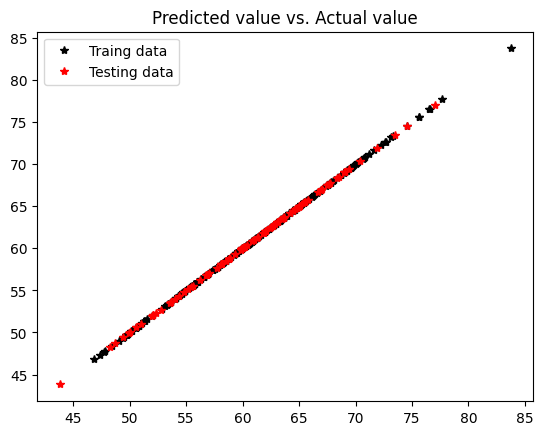

In [86]:
# import matplotlib for visualization

import matplotlib.pyplot as plt

plt.plot(y_train, ytrain_pred,'k*')
plt.plot(y_test, ytest_pred,'r*')

plt.title("Predicted value vs. Actual value")
plt.legend(["Traing data", "Testing data"])
plt.show()


7. Evaluate the results using metrics

In [87]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#evaluate on the training set
mae =mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', np.round(mae))
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ',r2)

#evaluate on the testing set
mae =mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', round(mae))
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ',r2)


Mean absolute error:  0.0
Mean squared error:  7.368159110734997e-06
R2 score is:  0.9999998435798942
Mean absolute error:  0
Mean squared error:  7.509312854897686e-06
R2 score is:  0.9999998176182876


In [89]:
np.mean(y_test)

np.float64(60.77044444444444)